In [2]:
import numpy as np

In [105]:
class NaiveBayes():
    def __init__(self,X,y):
        self.num_examples,self.num_features=X.shape
        self.num_classes=len(np.unique(y))
        self.eps=1e-6
    def fit(self,X,y):
        self.classes_mean={}
        self.classes_vari={}
        self.classes_prior={}
        for c in range(self.num_classes):            
            X_c=X[y==c]
            self.classes_mean[str(c)]=np.mean(X_c,axis=0)
            self.classes_vari[str(c)]=np.var(X_c,axis=0)
            self.classes_prior[str(c)]=X_c.shape[0]/self.num_examples    
    def predict(self,X):'''This function returns the final predictions by considering the difference between spam score and non spam score after checking if the difference is greater than the decisin threshold.'''
        probs=np.zeros((self.num_examples,self.num_classes))
        for c in range(self.num_classes):
            prior=self.classes_prior[str(c)]
            probs_c=self.density_function(X,self.classes_mean[str(c)],self.classes_vari[str(c)])
            probs[:, c]=probs_c+np.log(prior)   
        i=0
        diff=[]
        for c in probs:
            diff.append(c[0]-c[1])
            i=i+1        
        cl=[]        
        for c in diff:
            if c>0:
                cl.append(0)
            else:
                cl.append(1)
        return cl
    def density_function(self,x,mean,sigma):'''This function assigns a score to the spamness and non-spamness of the given email using gaussian probability naive bayes function.'''
        const=-self.num_features/2*np.log(2*np.pi)-0.5*np.sum(np.log(sigma+self.eps))
        probs=0.5*np.sum(np.power(x-mean,2)/(sigma+self.eps),1)
        return const-probs
if __name__=='__main__':
    X=np.load('x.npy')
    y=np.load('y.npy')
    print(X.shape)
    print(y.shape)
    NB=NaiveBayes(X,y)
    NB.fit(X,y)
    y_pred=NB.predict(X)
    print(sum(y_pred==y)/X.shape[0])

(5171, 18007)
(5171,)
0.956681492941404


In [ ]:
'''Storing the values of decision threshold,specificity,sensitivity,accuracy'''

In [92]:
decision_threshold=np.array([-1e10,-1e9,-1e8,-1e7,-1e6,-1e5,-1e4,-1e3,-1e2,-10,0,10,1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9,1e10])
accuracy=np.array([71.4,71.6,74.2,85.8,95.6,95.6,95.6,95.6,95.6,95.7,95.7,95.7,95.7,95.7,95.7,74.5,74.5,52.31,31.8,28.8,28.6])
specificity=np.array([100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,52.9,52.9,37.5,29.53,28.64,28.58])
sensitivity=np.array([71.4,71.5,73.5,83.3,94.2,94.2,94.2,94.2,94.2,94.3,94.3,94.3,94.3,94.3,94.3,100,100,100,100,100,100])


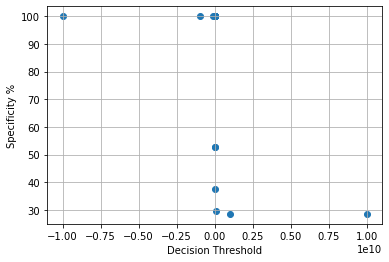

In [100]:
import matplotlib.pyplot as plt
plt.scatter(decision_threshold,specificity)
plt.xlabel("Decision Threshold")
plt.ylabel("Specificity %")
plt.grid()
plt.show()

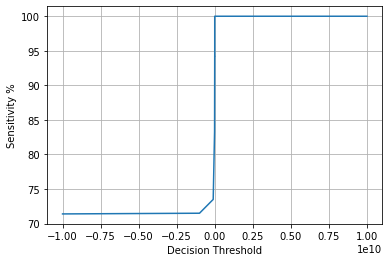

In [102]:
plt.plot(decision_threshold,sensitivity)
plt.xlabel("Decision Threshold")
plt.ylabel("Sensitivity %")
plt.grid()
plt.show()

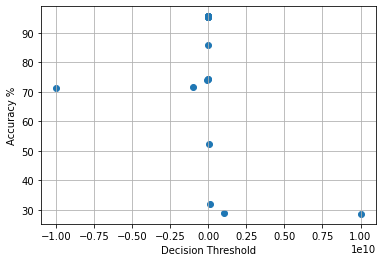

In [103]:
plt.scatter(decision_threshold,accuracy)
plt.xlabel("Decision Threshold")
plt.ylabel("Accuracy %")
plt.grid()
plt.show()

In [106]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y,y_pred)
print(confusion)
'''This code generates the confusion matrix for a particular decision threshold.
The first element in the first row of the matrix denotes the number of non spam emails that were rightly classified as non spam.
The second element of the first row of the matrix denotes the number of non spam emails that were wrongly classified as spam.
The first element of the second row of the matrix denotes the number of spam emails that were wrongly classfied as non spam.
The second element of the second row of the matrix denotes the number of spam emails that were rightly classified as spam.'''

[[3693    0]
 [ 224 1254]]
